### Intensity Transformation Operations on Images

Intensity transformations are applied on images for contrast manipulation or image thresholding. These are in the spatial domain, i.e. they are performed directly on the pixels of the image at hand, as opposed to being performed on the Fourier transform of the image. The following are commonly used intensity transformations:

 - Image Negatives (Linear)
 - Log Transformations
 - Power-Law (Gamma) Transformations
 - Piecewise-Linear Transformation Functions

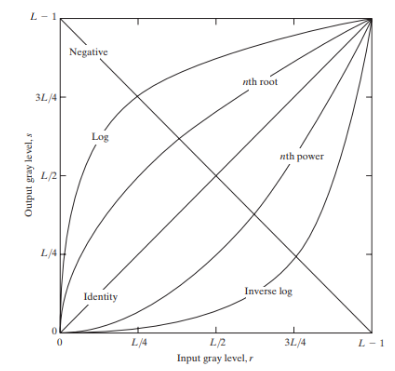

<b>Spatial Domain Processes:</b> Spatial domain processes can be described using the equation:

g(x,y) = T[f(x,y)] where,

f(x,y) - is the input image, T - is an operator on f defined over a neighbourhood of the point (x, y), and g(x, y) - is the output.

#### Image Negatives

Mathematically, assume that an image goes from intensity levels 0 to (L-1). Generally, L = 256. Then, the negative transformation can be described by the expression s = L-1-r where r is the initial intensity level and s is the final intensity level of a pixel. This produces a photographic negative.

#### Log Transformations

Mathematically, log transformations can be expressed as s = clog(1+r). Here, s is the output intensity, r>=0 is the input intensity of the pixel, and c is a scaling constant. c is given by 255/(log (1 + m)), where m is the maximum pixel value in the image. It is done to ensure that the final pixel value does not exceed (L-1), or 255. Practically, log transformation maps a narrow range of low-intensity input values to a wide range of output values.

In [1]:
import cv2
import numpy as np

In [2]:
# read the input image
image = cv2.imread("sample.jpg", 0)

cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# apply log transform
c = 255/(np.log(1 + np.max(image)))
log_transformed = c * np.log(1 + image)

# specify the datatype
log_transformed = np.array(log_transformed, dtype=np.uint8)

# save the output image
cv2.imwrite("log_transformed.jpg", log_transformed)

# display the log_transformed image
cv2.imshow("log_transformed", log_transformed)
cv2.waitKey()
cv2.destroyAllWindows()

#### Power-Law (Gamma) Transformation:

Power-law (gamma) transformations can be mathematically expressed as 

s = cr<sup>γ</sup>

Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. This is done because our eyes perceive images in a gamma-shaped curve, whereas cameras capture images in a linear fashion.

In [3]:
# read the input image
image = cv2.imread("sample.jpg", 0)

# let's try 4 gamma values
for gamma in [0.1, 0.5, 1.2, 2.2]:
    
    # apply gamma correction
    gamma_corrected = np.array(255*(image/255) ** gamma, dtype=np.uint8)
    
    # save the images
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)
    
    # display the images
    cv2.imshow("gamma_corrected", gamma_corrected)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### Piecewise-Linear Transformation Functions:

These functions, as the name suggests, are not entirely linear in nature. However, they are linear between certain x-intervals. One of the most commonly used piecewise-linear transformation functions is contrast stretching. Contrast can be defined as:

Contrast =  (I_max - I_min)/(I_max + I_min)

This process expands the range of intensity levels in an image so that it spans the full intensity of the camera/display. The figure below shows the graph corresponding to the contrast stretching.

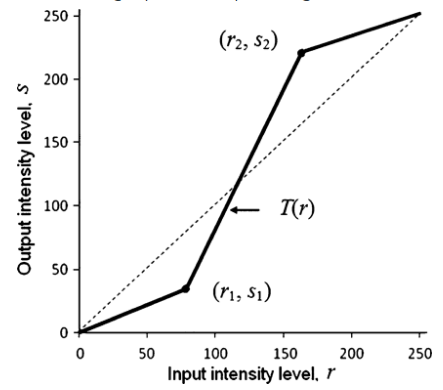

With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels by essentially decreasing the intensity of the dark pixels and increasing the intensity of the light pixels. If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect). The function is monotonically increasing so that the order of intensity levels between pixels is preserved.

In [4]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1 / r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2 
  
# Open the image. 
image = cv2.imread('sample.jpg') 
  
# Define parameters. 
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal) 
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(image, r1, s1, r2, s2) 
  
# Save edited image. 
cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

# display edited image
cv2.imshow("contrast_stretched", contrast_stretched)
cv2.waitKey()
cv2.destroyAllWindows()